# Final Project : Reproducibility Challenge [2]

# 1. Random Fourier Features
## 1.1 Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, zero_one_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

from sklearn.linear_model import LinearRegression, RidgeClassifier

from sklearn.linear_model import LinearRegression, SGDClassifier,LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from numpy.random import multivariate_normal

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("mnist/mnist_train.csv")
test = pd.read_csv("mnist/mnist_test.csv")
mnist = pd.concat([train, test])
mnist.shape

(70000, 785)

In [3]:
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))
train.head(5)

Training dataset has 60000 observations and 785 variables
Testing dataset has 10000 observations and 785 variables


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

### 1.2 Data processing

In [4]:
y = pd.get_dummies(mnist.label, prefix='label')
y.head()

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [5]:
mnist = pd.concat([y, mnist], axis=1)
display(mnist.head())

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,2

In [6]:
df_x=mnist.iloc[:,11:]/255
df_y=mnist.iloc[:,:10]

display(df_x.head())
display(df_y.head())

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_size=1/7, random_state=0)

n = X_train.shape[0]
d = X_train.shape[1]

print(X_train.shape)
print(X_test.shape)

(10000, 784)
(60000, 784)


### 1.3 Data transformation (1st layer)

In [24]:
def ReLU(x):
    return np.abs(x * (x > 0))

def transform_data(x,rff,n_random_features):
    
    d = 784
    mu = np.zeros(d)        # expectation of the random vector.
    sigma = 5*np.identity(d)  # covariance matrix of the random vector.

    #u = multivariate_normal(mean=mu, cov=sigma, size=n_random_features)
    u = np.random.randn(n_random_features, d)
    u_ = u/np.sqrt((u**2).sum(axis = 1))[:,None]
    
    if rff:
        layer1 = u.dot(np.array(x).T)
        layer1 = np.cos(layer1)
    
    else:
        layer1 = u_.dot(np.array(x).T)
        layer1 = ReLU(layer1)
    return layer1.T

In [22]:
N = 3
np.random.seed(0)
x_train = transform_data(X_train, rff=True, n_random_features=N)
np.random.seed(0)
x_test = transform_data(X_test, rff=True, n_random_features=N)

x_train.shape, x_test.shape

0.0627860662043691
0.0627860662043691


((10000, 3), (60000, 3))

# Multiple classifiers approach

### All together

In [11]:
def LogClassification(X_train, X_test, y_train, y_test):
    
    max_iter_=10000
    
    # Setting the labels for each class
    y0 = y_train.values[:,0]
    y_0 = y_test.values[:,0]
    y1 = y_train.values[:,1]
    y_1 = y_test.values[:,1]
    y2 = y_train.values[:,2]
    y_2 = y_test.values[:,2]
    y3=  y_train.values[:,3]
    y_3 = y_test.values[:,3]
    y4=  y_train.values[:,4]
    y_4 = y_test.values[:,4]
    y5 = y_train.values[:,5]
    y_5 = y_test.values[:,5]
    y6 = y_train.values[:,6]
    y_6 = y_test.values[:,6]
    y7=  y_train.values[:,7]
    y_7 = y_test.values[:,7]
    y8 = y_train.values[:,8]
    y_8 = y_test.values[:,8]
    y9=  y_train.values[:,9]
    y_9 = y_test.values[:,9]
    
    # Making a classifier for each class
    clf0 = LogisticRegression(max_iter = max_iter_)
    clf0.fit(X_train,y0)
    clf1 = LogisticRegression(max_iter = max_iter_)
    clf1.fit(X_train,y1)
    clf2 = LogisticRegression(max_iter = max_iter_)
    clf2.fit(X_train,y2)
    clf3 = LogisticRegression(max_iter = max_iter_)
    clf3.fit(X_train,y3)
    clf4 = LogisticRegression(max_iter = max_iter_)
    clf4.fit(X_train,y4)
    clf5 = LogisticRegression(max_iter = max_iter_)
    clf5.fit(X_train,y5)
    clf6 = LogisticRegression(max_iter = max_iter_)
    clf6.fit(X_train,y6)
    clf7 = LogisticRegression(max_iter = max_iter_)
    clf7.fit(X_train,y7)
    clf8 = LogisticRegression(max_iter = max_iter_)
    clf8.fit(X_train,y8)
    clf9 = LogisticRegression(max_iter = max_iter_)
    clf9.fit(X_train,y9)
    
    # Making probability predictions for each class
    pred0 = clf0.predict_proba(X_test)[:,1]
    pred1 = clf1.predict_proba(X_test)[:,1]
    pred2 = clf2.predict_proba(X_test)[:,1]
    pred3 = clf3.predict_proba(X_test)[:,1]
    pred4 = clf4.predict_proba(X_test)[:,1]
    pred5 = clf5.predict_proba(X_test)[:,1]
    pred6 = clf6.predict_proba(X_test)[:,1]
    pred7 = clf7.predict_proba(X_test)[:,1]
    pred8 = clf8.predict_proba(X_test)[:,1]
    pred9 = clf9.predict_proba(X_test)[:,1]
    
    # Collecting all probability predictions into one DataFrame
    probability_predictions = np.array([pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, ]).T
    probability_predictions = pd.DataFrame(probability_predictions)
    
    # Selecting the class based on the probability predictions
    predictions = pd.DataFrame(np.where(probability_predictions.T == probability_predictions.T.max(), 1, 0),index=probability_predictions.columns).T
    
    # Calculating the accuracy
    accuracy = accuracy_score(y_test, predictions.values) * 100
    return  accuracy

In [12]:
def LinClassification(X_train, X_test, y_train, y_test):
    
    max_iter_=10000
    
    # Setting the labels for each class
    y0 = y_train.values[:,0]
    y_0 = y_test.values[:,0]
    y1 = y_train.values[:,1]
    y_1 = y_test.values[:,1]
    y2 = y_train.values[:,2]
    y_2 = y_test.values[:,2]
    y3=  y_train.values[:,3]
    y_3 = y_test.values[:,3]
    y4=  y_train.values[:,4]
    y_4 = y_test.values[:,4]
    y5 = y_train.values[:,5]
    y_5 = y_test.values[:,5]
    y6 = y_train.values[:,6]
    y_6 = y_test.values[:,6]
    y7=  y_train.values[:,7]
    y_7 = y_test.values[:,7]
    y8 = y_train.values[:,8]
    y_8 = y_test.values[:,8]
    y9=  y_train.values[:,9]
    y_9 = y_test.values[:,9]
    
    # Making a classifier for each class
    clf0 = LinearRegression()
    clf0.fit(X_train,y0)
    clf1 = LinearRegression()
    clf1.fit(X_train,y1)
    clf2 = LinearRegression()
    clf2.fit(X_train,y2)
    clf3 = LinearRegression()
    clf3.fit(X_train,y3)
    clf4 = LinearRegression()
    clf4.fit(X_train,y4)
    clf5 = LinearRegression()
    clf5.fit(X_train,y5)
    clf6 = LinearRegression()
    clf6.fit(X_train,y6)
    clf7 = LinearRegression()
    clf7.fit(X_train,y7)
    clf8 = LinearRegression()
    clf8.fit(X_train,y8)
    clf9 = LinearRegression()
    clf9.fit(X_train,y9)
    
    # Making probability predictions for each class
    pred0 = clf0.predict(X_test)
    pred1 = clf1.predict(X_test)
    pred2 = clf2.predict(X_test)
    pred3 = clf3.predict(X_test)
    pred4 = clf4.predict(X_test)
    pred5 = clf5.predict(X_test)
    pred6 = clf6.predict(X_test)
    pred7 = clf7.predict(X_test)
    pred8 = clf8.predict(X_test)
    pred9 = clf9.predict(X_test)
    
    # Collecting all probability predictions into one DataFrame
    probability_predictions = np.array([pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, ]).T
    probability_predictions = pd.DataFrame(probability_predictions)
    
    # Selecting the class based on the probability predictions
    predictions = pd.DataFrame(np.where(probability_predictions.T == probability_predictions.T.max(), 1, 0),index=probability_predictions.columns).T
    
    # Calculating the accuracy
    accuracy = accuracy_score(y_test, predictions.values) * 100
    return  accuracy

In [13]:
def RidClassification(X_train, X_test, y_train, y_test):
# Setting the labels for each class
    y0 = y_train.values[:,0]
    y_0 = y_test.values[:,0]
    y1 = y_train.values[:,1]
    y_1 = y_test.values[:,1]
    y2 = y_train.values[:,2]
    y_2 = y_test.values[:,2]
    y3=  y_train.values[:,3]
    y_3 = y_test.values[:,3]
    y4=  y_train.values[:,4]
    y_4 = y_test.values[:,4]
    y5 = y_train.values[:,5]
    y_5 = y_test.values[:,5]
    y6 = y_train.values[:,6]
    y_6 = y_test.values[:,6]
    y7=  y_train.values[:,7]
    y_7 = y_test.values[:,7]
    y8 = y_train.values[:,8]
    y_8 = y_test.values[:,8]
    y9=  y_train.values[:,9]
    y_9 = y_test.values[:,9]

    # Making a classifier for each class
    clf0 = RidgeClassifier()
    clf0.fit(X_train,y0)
    clf1 = RidgeClassifier()
    clf1.fit(X_train,y1)
    clf2 = RidgeClassifier()
    clf2.fit(X_train,y2)
    clf3 = RidgeClassifier()
    clf3.fit(X_train,y3)
    clf4 = RidgeClassifier()
    clf4.fit(X_train,y4)
    clf5 = RidgeClassifier()
    clf5.fit(X_train,y5)
    clf6 = RidgeClassifier()
    clf6.fit(X_train,y6)
    clf7 = RidgeClassifier()
    clf7.fit(X_train,y7)
    clf8 = RidgeClassifier()
    clf8.fit(X_train,y8)
    clf9 = RidgeClassifier()
    clf9.fit(X_train,y9)

    # Making probability predictions for each class
    pred0 = clf0.predict(X_test)
    pred1 = clf1.predict(X_test)
    pred2 = clf2.predict(X_test)
    pred3 = clf3.predict(X_test)
    pred4 = clf4.predict(X_test)
    pred5 = clf5.predict(X_test)
    pred6 = clf6.predict(X_test)
    pred7 = clf7.predict(X_test)
    pred8 = clf8.predict(X_test)
    pred9 = clf9.predict(X_test)

    # Collecting all probability predictions into one DataFrame
    probability_predictions = np.array([pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, ]).T
    probability_predictions = pd.DataFrame(probability_predictions)

    # Selecting the class based on the probability predictions
    predictions = pd.DataFrame(np.where(probability_predictions.T == probability_predictions.T.max(), 1, 0),index=probability_predictions.columns).T

    # Calculating the accuracy
    accuracy = accuracy_score(y_test, predictions.values) * 100
    return accuracy

In [ ]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma=1,n_components = 10000)

rbf_feature.fit(df_x)
X_train_rff = rbf_feature.transform(X_train)
X_test_rff = rbf_feature.transform(X_test)

## [Testing]

In [29]:
scaler = StandardScaler()
nb_comp = [10, 100,500, 1000,2000,3000,4000, 5000,6000,7000,8000,9000, 10000,11000,12000, 15000, 20000]
accuracies = []
for N in tqdm(nb_comp):

    np.random.seed(0)
    x_train = transform_data(X_train, rff=False, n_random_features=N)
    np.random.seed(0)
    x_test = transform_data(X_test, rff=False, n_random_features=N)

    accuracy = LogClassification(x_train, x_test, y_train, y_test)
    accuracies.append(accuracy)

100%|████████████████████████████████████████| 17/17 [1:08:01<00:00, 240.09s/it]


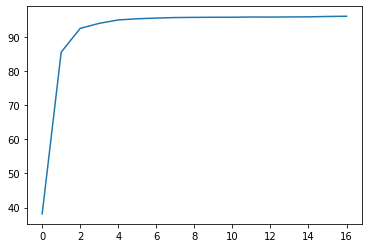

In [31]:
plt.plot(accuracies)

### Plots

In [ ]:
random_relu_features = [1, 750, 1500, 2250, 3000, 3750, 4500, 5250, 6000, 6750, 7500, 8250, 9000, 
                        9750, 10000,12000,14000,16000,18000,20000, 40000,60000]

losses_train = []
losses_test = []
accuracy_list = []

for N in tqdm(random_relu_features[:17]):

    x_train = transform_data(X_train, rff=False, n_random_features=N)
    x_test = transform_data(X_test, rff=False, n_random_features=N)
    
    accuracy = LogClassification(x_train, x_test, y_train, y_test)
    accuracy_list.append(accuracy)
    
    #loss_train = 1 - reg.score(x_train, y_train)
    #loss_test = 1 - reg.score(x_test, y_test)
    
    #losses_train.append(loss_train)
    #losses_test.append(loss_test)

#plt.plot(losses_test, label = "Test", lw=3)
#plt.plot(losses_train, label = "Train", lw=3)
#plt.legend()
#plt.show()

plt.plot(accuracy_list)

# Deep learning approach

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# define the hyperparameters
BATCH_SIZE = 1024
TEST_BATCH_SIZE = 2048

# find out which device is available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

transform = transforms.Compose([
    torchvision.transforms.ToTensor(),
    # torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

# load the train dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data/', 
    train=False, 
    download=True,
    transform=transform)

# load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data/', 
    train=True, 
    download=True,
    transform=transform)

# construct the dataloader for the traininig dataset. 
# Here we shuffle the data to promote stochasticity.
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True, 
    num_workers=2)


# Construct the dataloader for the testing dataset.
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=TEST_BATCH_SIZE,
    shuffle=False, 
    num_workers=2)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

class BasicModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Here we define the model modules
        

    def forward(self, x):
        # defines the forward function of the model. 
        raise NotImplementedError


    def fit(self, train_dataloader, optimizer, epochs, device, plot_loss=True):
        losses = []
        for epoch in range(epochs):
            running_loss = self.train_epoch(
                train_dataloader=train_dataloader, 
                optimizer=optimizer, 
                epoch_idx=epoch,
                device=device)
            
            losses.append(running_loss)

        if plot_loss:
            self.plot_loss_progression(losses=losses)

    def plot_loss_progression(self, losses):
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel("Loss")
        plt.title("Loss progression across epochs")

    def train_epoch(self, train_dataloader, optimizer, epoch_idx, device):
        running_loss = 0.0

        self.train()
        tk0 = tqdm(train_dataloader, total=len(train_dataloader), desc=f"Epoch {epoch_idx}")
        for batch_idx, (data, target) in enumerate(tk0):
            
            # ***************************************************
            # INSERT YOUR CODE HERE
            # Copy paste from before.
            # ***************************************************   
            data, target = data.to(device), target.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            output = self(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            avg_loss = running_loss / (batch_idx + 1)
            tk0.set_postfix(loss=avg_loss, stage="train")

        
        return running_loss / len(train_dataloader.dataset)


    def predict(self, test_dataloader, device):
        self.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_dataloader:
                # ***************************************************
                # INSERT YOUR CODE HERE
                # Copy paste from before.
                # ***************************************************  
                data, target = data.to(device), target.to(device)
                output = self(data)
                loss = F.cross_entropy(output, target)
                
                test_loss += loss.item()
                pred = output.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum()

        test_loss /= len(test_dataloader.dataset)
        accuracy = 100. * (1.0-correct / len(test_dataloader.dataset))
        #print(f'Test set: Avg. loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_dataloader.dataset)} ({accuracy:.0f}%)')
        return accuracy

In [ ]:
class myLayer(nn.Module):
    def __init__(self,size_in, n_features):
        super().__init__()
        self.size = size_in
        weight = torch.Tensor(torch.ones([n_features,self.size]));
        self.weight = nn.Parameter(weight)
        torch.nn.init.normal_(self.weight, mean=0.0, std=1.0)
    
    def forward(self,x):
        a = torch.div(self.weight.T,torch.sqrt(torch.sum((self.weight**2),dim=1))).T
        return torch.matmul(x, a.T)

In [ ]:
# We create a model identical with the previous one.

class MLP(BasicModel): # inherit the BasicModel class

    def __init__(self, n_features):
        super().__init__()
        # input layer has 28x28=784 features 
        self.fc1 = myLayer(784,n_features)
        # the output layer has 10 neurons. i.e. the number of output classes.
        self.fc2 = nn.Linear(n_features, 10)
        # we also define the non-linearity 
        self.relu = nn.ReLU()


    def forward(self, x):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # Copy paste from before.
        # ***************************************************  
         # transform the image to a vector
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)

        # pass the vectored image through the layers
        #print("Before L1 shape is : {}".format(x.shape))
        x = self.fc1(x)
        #print("After L1 shape is : {}".format(x.shape))
        x = self.relu(x)
        #print("After F1 shape is : {}".format(x.shape))
        x = self.fc2(x)
        #print("After L2 shape is : {}".format(x.shape))
        return x

    
def mlp_train(n_features,train_dataloader, test_dataloader):    
    # initialize model and define the optimizer. 
    mlp = MLP(n_features).to(DEVICE)

    # Instead of SGD we will use a more sophisticated one called Adam.
    #optimizer = optim.Adam(mlp.parameters(), lr=LEARNING_RATE)
    optimizer = optim.SGD(mlp.parameters(), lr=LEARNING_RATE)

    # train the mlp
    mlp.fit(
        train_dataloader=train_dataloader, 
        optimizer=optimizer,
        epochs=N_EPOCHS,
        device=DEVICE)

    train_accuracy = mlp.predict(test_dataloader=train_dataloader, device=DEVICE)
    test_accuracy = mlp.predict(test_dataloader=test_dataloader, device=DEVICE)
    return train_accuracy, test_accuracy

In [ ]:
random_relu_features = [1, 750, 1500, 2250, 3000, 3750, 4500, 5250, 6000, 6750, 7500, 8250, 9000, 
                        9750, 10000,12000,14000,16000,18000,20000, 40000,60000]
random_relu_features_ = [1, 1000,10000,15000,20000,40000,60000]
train_accuracies = []
test_accuracies = []
iteration = 1

# define the hyperparameters
LEARNING_RATE = 0.1
N_EPOCHS = 10

list_of_features = random_relu_features_

for n_features in list_of_features:

    train_accuracy, test_accuracy = mlp_train(n_features,train_dataloader, test_dataloader)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print("FINISHED ITERATION : {} ".format(iteration))
    iteration +=1

In [ ]:
plt.plot(test_accuracies, label = "Test", lw=3)
plt.plot(train_accuracies, label = "Train", lw=3)
plt.xticks(range(len(test_accuracies)), list(map(str, list_of_features) ))
plt.legend()
plt.show()

## Plotting u 

In [ ]:
d = 3
mu = np.zeros(d)        # expectation of the random vector.
sigma = 5*np.identity(d)  # covariance matrix of the random vector.
#u = multivariate_normal(mean=mu, cov=sigma, size=500)
u = np.random.randn(500, 3)
a= u/np.sqrt((u**2).sum(axis = 1))[:,None]

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
x = list(a[:,0])
y = list(a[:,1])
z = list(a[:,2])
ax.scatter3D(x,y,z);